# Overlapping Generations with bequest motives

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from OLGModel import OLGModelClass

# Model description

Our model extends on the traditional OLG model with a government by introducing the possibility for agents to either consume their entire savings in period 2 or to transfers some of their savings to the next generation as a bequest. This increases the complexity for the model, as agents now has to optimize both for their optimal savings rate but also for the optimal level of bequests.

As our model is an extension the formal outline below resembels the example provided in the course to a great extent.

**Time:** Discrete and indexed by $t\in\{0,1,\dots\}$.

**Demographics:** Population is constant. A life consists of
two periods, *young* and *old*.

**Households:** As young a household supplies labor exogenously, $L_{t}=1$, and earns a after tax wage $(1-\tau_w)w_{t}$. Consumption as young and old
are denoted by $C_{1t}$ and $C_{2t+1}$. The after-tax return on saving is $(1-\tau_{r})r_{t+1}$. Utility is
    
$$
\begin{aligned}
U & =\max_{s_{t}\in[0,1],\chi_{t+1}}\frac{C_{1t}^{1-\sigma}}{1-\sigma}+\beta(\frac{C_{2t+1}^{1-\sigma}}{1-\sigma} + \pi\frac{(1-\tau_{\chi})\chi_{t+1}^{1-\nu}}{1-\nu}),\,\,\,\beta > -1, \sigma > 0\\
 & \text{s.t.}\\
 & S_{t}=s_{t}((1-\tau_{w})w_{t}+\Gamma_t)\\
 & C_{1t}=(1-s_{t})((1-\tau_{w})w_{t}+ \Gamma_t)\\
 & \chi_{t+1}+ C_{2t+1}=(1+(1-\tau_{r})r_{t+1})S_{t}
\end{aligned}
$$
    
The problem is formulated in terms of the saving rate $s_t\in[0,1]$ and the bequest $\chi_{t+1}$. The bequest recived follows the law-of-motion below

$$
\begin{aligned}
\Gamma_t = (1+(1-\tau_{\chi})r_{t-1})\chi_{t-1}
\end{aligned}
$$



The law-of-motion for the bequest is simply the bequest saved by the agents in last period corrected by the post-tax return. Therefore, we assume that the bequest can be renumerated by the same interest rates as savings. An interesting feature of the modifications, is that we allow for different tax-rates between bequests and savings.

**Firms:** Firms rent capital $K_{t-1}$ at the rental rate $r_{t}^{K}$,
and hires labor $E_{t}$ at the wage rate $w_{t}$. Firms have access
to the production function
    
$$
\begin{aligned}
Y_{t}=F(K_{t-1},E_{t})=(\alpha K_{t-1}^{-\theta}+(1-\alpha)E_{t}^{-\theta})^{\frac{1}{-\theta}},\,\,\,\theta>-1,\alpha\in(0,1)
\end{aligned}
$$
    
Profits are
    
$$
\begin{aligned}
\Pi_{t}=Y_{t}-w_{t}E_{t}-r_{t}^{K}K_{t-1}
\end{aligned}
$$

**Government:** Choose public consumption, $G_{t}$, and tax rates $\tau_w \in [0,1]$ and $\tau_r \in [0,1]$. Total tax revenue is
    
$$
\begin{aligned}
T_{t} &=\tau_r r_{t} (K_{t-1}+B_{t-1})+\tau_w w_{t}   
\end{aligned}
$$
    
Government debt accumulates according to
    
$$
\begin{aligned}
B_{t} &=(1+r^b_{t})B_{t-1}-T_{t}+G_{t} 
\end{aligned}
$$
       
A *balanced budget* implies $G_{t}=T_{t}-r_{t}B_{t-1}$.

**Capital:** Depreciates with a rate of $\delta \in [0,1]$.

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. No-arbitrage between bonds and capital

    $$
    r_{t}=r_{t}^{K}-\delta=r_{t}^{b}
    $$

4. Labor market clears: $E_{t}=L_{t}=1$
5. Goods market clears: $Y_{t}=C_{1t}+C_{2t}+G_{t}+I_{t}$
6. Asset market clears: $S_{t}=K_{t}+B_{t}+ \chi_{t}$
7. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t}$

## Analytical solution

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & =F_{K}(K_{t-1},E_{t})=\alpha K_{t-1}^{-\theta-1}Y_{t}^{1+\theta}\\
w_{t} & =F_{E}(K_{t-1},E_{t})=(1-\alpha)E_{t}^{-\theta-1}Y_{t}^{1+\theta}
\end{aligned}
$$

**Implication of utility maximization:** From FOC

$$
\begin{aligned}
C_{1t}^{-\sigma} &= \beta (1+(1-\tau_r)r_{t+1})C_{2t+1}^{-\sigma}\\
C_{1t}^{-\sigma} &= \beta (1+(1-\tau_r)r_{t+1})\chi_{t+1}^{-\nu}(1-\tau_{\chi})
\end{aligned}
$$

This in turn implies

$$
\begin{aligned}
\chi_{t+1} &= C_{2t+1}^\frac{\sigma}{\nu}(1-\tau_{\chi})
\end{aligned}
$$

**Simulation algorithm:** At the beginning of period $t$, the
economy can be summarized in the state variables $K_{t-1}$ and $B_{t-1}$.  *Before* $s_t$ is known, we can calculate:

$$
\begin{aligned}
Y_{t} & =F(K_{t-1},1)\\
r_{t}^{k} & =F_{K}(K_{t-1},1)\\
w_{t} & =F_{E}(K_{t-1},1)\\
r_{t} & =r^k_{t}-\delta\\
r_{t}^{b} & =r_{t}\\
\tilde{r}_{t} & =(1-\tau_{r})r_{t}\\
C_{2t} & =(1+\tilde{r}_{t})(K_{t-1}+B_{t-1})\\
T_{t} & =\tau_{r}r_{t}(K_{t-1}+B_{t-1}-(1+r_t)\chi_{t-1})+\tau_{w}w_{t} +\tau_{\chi}r_t\chi_{t-1} \\
B_{t} & =(1+r^b_{t})B_{t-1}+T_{t}-G_{t}\\
\end{aligned}
$$

*After* $s_t$ is known we can calculate:

$$
\begin{aligned}
C_{1t} & = (1-s_{t})(1-\tau_{w})w_{t}\\
I_{t} & =Y_{t}-C_{1t}-C_{2t}-G_{t}+\chi_t\\
K_{t} & =(1-\delta)K_{t-1} + I_t \\
\Gamma_t &= (1+(1-\tau_{\chi})r_{t-1})\chi_{t-1}
\end{aligned}
$$

**Solution algorithm:** Simulate forward choosing $s_{t}$ so
that we always have

$$
\begin{aligned}
C_{1t}^{-\sigma}=\beta(1+\tilde{r}_{t+1})C_{2t+1}^{-\sigma}
\end{aligned}
$$

## Numerical solution

In [2]:
model = OLGModelClass()
par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# b. households
par.sigma = 2.0

# c. government
par.tau_w = 0.0
par.tau_r = 0.0
par.tau_gamma = 0
sim.balanced_budget[:] = True # G changes to achieve this

# d. initial values
K_ss = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))
par.K_lag_ini = 0.1*K_ss

# e. Bequests
par.model = 'bequest' # 1: Bequests are a part of the model, 0: Bequests are not

initializing the model:
calling .setup()
calling .allocate()


In [3]:
model.simulate()

simulation done in 0.62 secs


In [4]:
K_lag_old = model.sim.K_lag.copy()

K_ss_model1 = sim.K_lag[-1]
B_ss = sim.B_lag[-1]
G_ss = sim.G[-1]
chi_SS = sim.chi[-1]

chi_base = model.sim.chi_lag.copy()
k_base = model.sim.K_lag.copy()

Example of Euler equation evaluations in five periods. The first function is a standard Euler equation, while the second ensures the entire budget is allocated when old, and the distribution between bequest and consumption satisfies the specific FOC provided above.

In [5]:
for t in range(5):

    LHS_Euler = sim.C1[t]**(-par.sigma)
    RHS_Euler = (1+sim.rt[t+1])*par.beta * sim.C2[t+1]**(-par.sigma)
    
    print(f't = {t:2d}: euler-error = {LHS_Euler-RHS_Euler:.8f}')
    
    LHS_Euler2 = sim.C2[t] + sim.chi[t]
    RHS_Euler2 = (1+sim.rt[t])*(sim.K_lag[t]+sim.B_lag[t])
    print(f't = {t:2d}: euler-error 2 = {LHS_Euler2-RHS_Euler2:.8f}')           

t =  0: euler-error = 0.00000000
t =  0: euler-error 2 = 0.00000000
t =  1: euler-error = -0.00000000
t =  1: euler-error 2 = 0.00000000
t =  2: euler-error = -0.00000000
t =  2: euler-error 2 = 0.00000000
t =  3: euler-error = 0.00000000
t =  3: euler-error 2 = 0.00000000
t =  4: euler-error = -0.00000000
t =  4: euler-error 2 = 0.00000000


As we can see above both our Euler equation 1 and 2 converges. The first euler equation is from the standard OLG framework, whereas the second euler equation ensures that other agents also opts for the optimal Bequest.

# Further analysis

We check for convergence in the model for slightly different start parameter values, the convergence should not change significantly and the steady state should be within the same range

In [6]:
#New start parameters

par = model.par # SimpeNamespace
sim = model.sim # SimpeNamespace

# a. production
par.production_function = 'cobb-douglas'
par.theta = 0.0

# b. households
par.sigma = 2

# c. government
par.tau_w = 0.001
par.tau_r = 0.5

sim.balanced_budget[:] = True # G changes to achieve this

# d. initial values
K_ss = ((1-par.alpha)/((1+1.0/par.beta)))**(1/(1-par.alpha))
par.K_lag_ini = 0.1*K_ss

#Simulate model
model.simulate()

simulation done in 0.18 secs


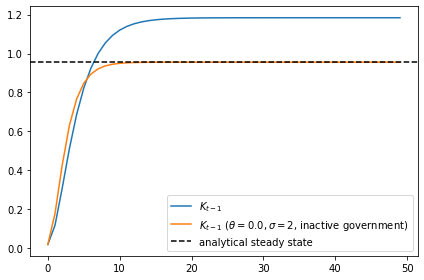

In [7]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(model.sim.K_lag,label=r'$K_{t-1}$')
ax.plot(K_lag_old,label=r'$K_{t-1}$ ($\theta = 0.0, \sigma = 2$, inactive government)')
ax.axhline(K_ss_model1,ls='--',color='black',label='analytical steady state')
ax.legend(frameon=True)
fig.tight_layout()

The converges look pretty neat for both cases. If the converges deviates significantly, when changes the variables slightly, it would indicate that the model is not build correctly.

## The heritage tax, $\tau_{\chi}$, on bequest increases

In this section we will see how consumption and bequest changes in the second period of agents life, if the heritage tax for bequests increases.  

We adjust the heritage rate for bequests:

In [8]:

model_tax = OLGModelClass()
# tax model

par_tax = model_tax.par # SimpeNamespace
sim_tax = model_tax.sim # SimpeNamespace

# a. production
par_tax.production_function = 'cobb-douglas'
par_tax.theta = 0.0

# b. households
par_tax.sigma = 2

# c. government
par_tax.tau_w = 0.001
par_tax.tau_r = 0.5

sim_tax.balanced_budget[:] = True # G changes to achieve this

# d. initial values
K_ss = ((1-par_tax.alpha)/((1+1.0/par_tax.beta)))**(1/(1-par_tax.alpha))
par_tax.K_lag_ini = 0.1*K_ss

#Simulate model
model.simulate()

# c. government
par_tax.tau_w = 0.0
par_tax.tau_r = 0.0
par_tax.tau_gamma = 0.5

sim_tax.balanced_budget[:] = True # G changes to achieve this

# d. initial values
K_ss = ((1-par_tax.alpha)/((1+1.0/par_tax.beta)))**(1/(1-par_tax.alpha))
par_tax.K_lag_ini = 0.1*K_ss

model_tax.simulate()

initializing the model:
calling .setup()
calling .allocate()
simulation done in 0.26 secs
simulation done in 0.38 secs


Plot the new trends

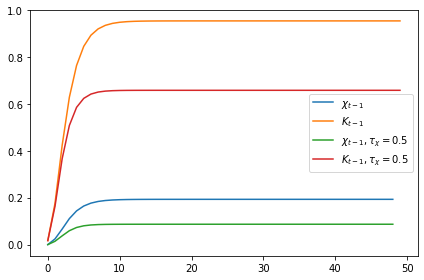

In [9]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(chi_base[:49],label=r'$\chi_{t-1}$')
ax.plot(k_base,label=r'$K_{t-1}$')
ax.plot(sim_tax.chi_lag[:49],label=r'$\chi_{t-1}, \tau_{\chi}=0.5$')
ax.plot(sim_tax.K_lag,label=r'$K_{t-1}, \tau_{\chi}=0.5$')

ax.legend(frameon=True)
fig.tight_layout()

We see that when we increase the taxrate on heritage, we have a lower build up of capital as the economy experience a deadweight loss from the higher taxrate.

Finally we compare to we compare to the vanilla OLG model without bequest motive and conduct welfare analysis.

In [10]:
model_standard = OLGModelClass()
par_std = model_standard.par # SimpeNamespace
sim_std = model_standard.sim # SimpeNamespace

# a. production
par_std.production_function = 'cobb-douglas'
par_std.theta = 0.0

# b. households
par_std.sigma = 2.0

# c. government
par_std.tau_w = 0.0
par_std.tau_r = 0.0
par_std.tau_gamma = 0
sim.balanced_budget[:] = True # G changes to achieve this

# d. initial values
K_ss = ((1-par_std.alpha)/((1+1.0/par_std.beta)))**(1/(1-par_std.alpha))
par_std.K_lag_ini = 0.1*K_ss

# e. Bequests
par_std.model = 'standard'

model_standard.simulate()

initializing the model:
calling .setup()
calling .allocate()
simulation done in 0.09 secs


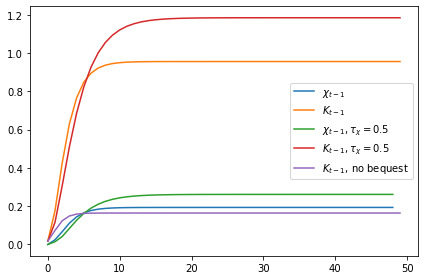

In [11]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(chi_base[:49],label=r'$\chi_{t-1}$')
ax.plot(k_base,label=r'$K_{t-1}$')
ax.plot(model.sim.chi_lag[:49],label=r'$\chi_{t-1}, \tau_{\chi}=0.5$')
ax.plot(model.sim.K_lag,label=r'$K_{t-1}, \tau_{\chi}=0.5$')
ax.plot(sim_std.K_lag,label=r'$K_{t-1}$, no bequest')

ax.legend(frameon=True)
fig.tight_layout()

CEV (Consumption Equivalent Variation) is a widely used measure for welfare effect. The results below can be interpreted as the change required in consumption for either young, old or lifetime in the vanilla model to make either young, old or lifetime households indifferent between the three model setups. Note the standard OLG and bequest are both nested versions of the OLG model with bequest and taxes.

In [12]:
def cev(par,sim,sim1):
    '''Currently CEV is only calculated for models in which structural paramters are the same
    INPUT:
    par: par for standard model
    sim: sim for standard model
    sim1: sim for extended model
    '''

    ss = par.simT - 2
    
    cev_young = (sim1.C1[ss]/sim.C1[ss]-1)*100
    cev_old = ((sim1.u_old[ss]/(1-par.sigma))**(1/(1-par.sigma))/sim.C1[ss]-1)*100

    cev_life = ((sim1.u_life[ss]/sim.u_life[ss])**(1/(1-par.sigma))-1)*100

    return cev_young, cev_old, cev_life

In [13]:
cev_ = np.zeros((3,3))
cev_[1] = cev(par_std,sim_std,sim)
cev_[2] = cev(par_std,sim_std,sim_tax)

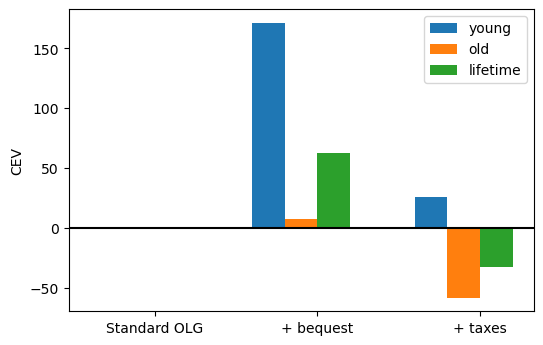

In [14]:
fig, ax = plt.subplots(dpi=100)

names = ['Standard OLG','+ bequest','+ taxes']
xs = np.arange(3)
dx = (np.arange(cev_.shape[1])-cev_.shape[1]/2.)/(cev_.shape[1]+2.)
d = 1./(cev_.shape[1]+2.)

ax.bar(x=xs+dx[0],width=d,height=cev_[:,0],label= 'young')
ax.bar(x=xs+dx[1],width=d,height=cev_[:,1],label= 'old')
ax.bar(x=xs+dx[2],width=d,height=cev_[:,2],label= 'lifetime')
ax.axhline(0,c='k')
ax.set_ylabel('CEV')

ax.legend(frameon=True)

ax.set_xticks(xs, names)

plt.show()

In [15]:
print(f'Percent change in lifetime consumption in the standard model for household lifetime utility to equal lifetime utility with bequest motive: {cev_[1,2]:.1f}%')
print(f'Percent change in lifetime consumption in the standard model for household lifetime utility to equal lifetime utility with bequest motive+taxes: {cev_[2,2]:.1f}%')

Percent change in lifetime consumption in the standard model for household lifetime utility to equal lifetime utility with bequest motive: 62.4%
Percent change in lifetime consumption in the standard model for household lifetime utility to equal lifetime utility with bequest motive+taxes: -32.8%


We see from the above welfare analysis that the lifetime utility greatly improves with bequest motive, as the old receive more utility by leaving a bequest, which both goes to the young generation, but also helps increase the capital stock and thus production which grealy benefits the young generation.

However when a bequest tax is introduced the utility of the old generation fall and they are worse off than in the standard OLG model, since they only receive utility of the amount they know the next generation will receive (the after-tax bequest) they will have to spend more to keep up the after-tax bequest. Which means less consumption. The young generation are still better off, but the lifetime utility is lower. 

# Conclusion

In this model setup we introduced bequests, which provides agents an alternative in the second period other than consumption. Thus, the agents have to both choose their optimal savings rate in period 1, but also their optimal bequests in period 2. In turn, the post-tax bequests provides them utility, which can be interpreted as utility gain from inheritance to the next generation. With the addition of a unique tax on bequests, we can analyze the effect on the economy of a higher hertiage tax. We conclude that as inheritance tax increases the agents experience a larger deadweight loss from 

To-do list (This list is to remind ourselves of what to fix before the exam):

- Forklaring af model (Intution)
- Timeline af forløbet med arv
- Kode optimering, find optimal saving rate og arv rate
- Konklusion
- Graf uden fleksibilitet
- 

